In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
iris = sns.load_dataset("iris")
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


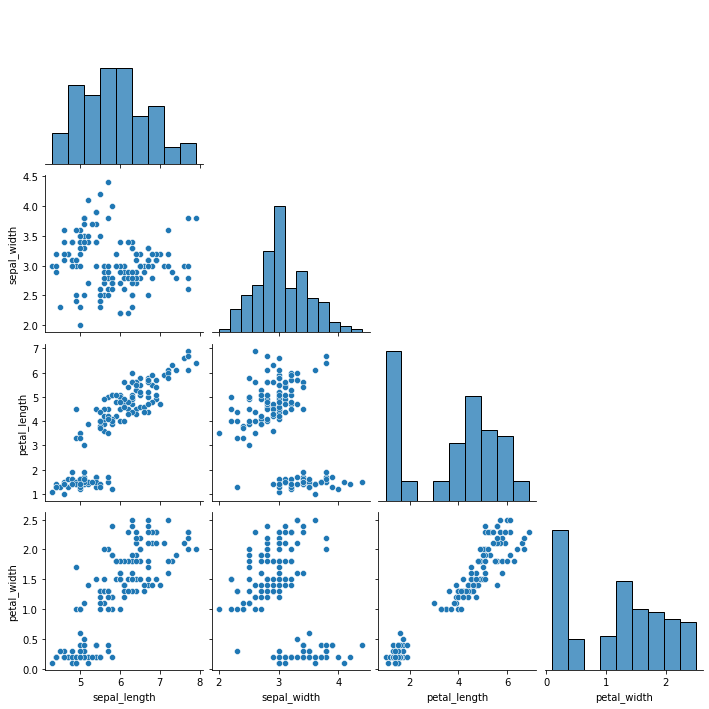

In [5]:
#What does the distribution of petal lengths look like?
sns.pairplot(iris,corner=True)

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

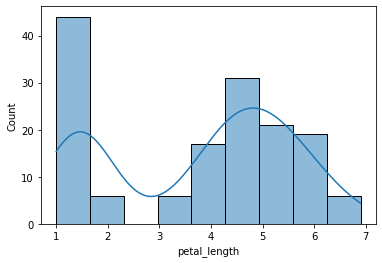

In [43]:
#What does the distribution of petal lengths look like?
sns.histplot(iris.petal_length,kde=True)
#sns.displot(iris.petal_length,kde=True)

<AxesSubplot:>

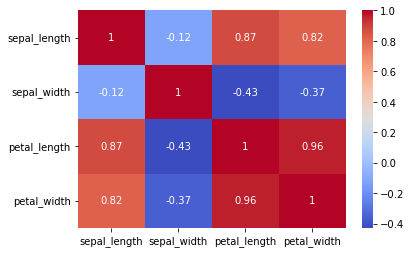

In [7]:
#Is there a correlation between petal length and petal width? 
# Use http://guessthecorrelation.com/ as a hint to how we could visually 
# determine if a correlation exists between two numeric columns.
sns.heatmap(
    iris.corr(),
    annot=True,
    cmap="coolwarm"
    )
#yes, close to 1 (pierson R corr)

#sns.relplot(data=iris,x="petal_length,y="petal_width,hue="species")

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 62.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: Us

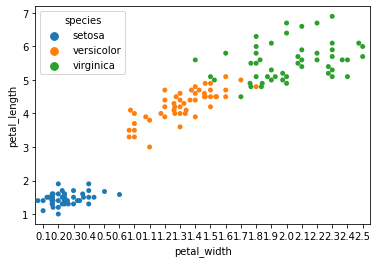

In [8]:
#Would it be reasonable to predict species 
# based on sepal width and sepal length? 
# For this, you'll 
# visualize two numeric columns through the lense of a categorical column.
sns.swarmplot(
    data=iris,
    y="petal_length",
    x="petal_width",
    hue = "species"
)
plt.show()
#sns.relplot(data=iris, x="sepal_length", y="sepal_width",hue="species")

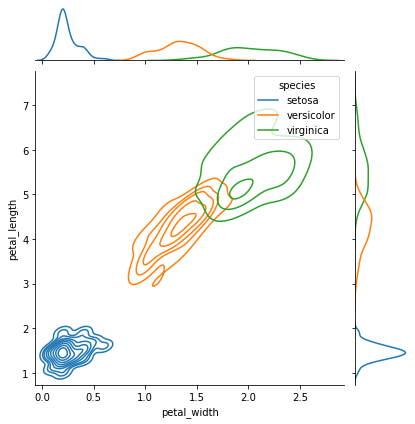

In [9]:
sns.jointplot(
    data=iris,
    y="petal_length",
    x="petal_width",
    hue="species",
    kind = "kde"
)

##i would say you could get a pretty good idea, yes
#sns.boxplot(y="sepal_length", x="species",data=iris)

In [10]:
#Which features would be best used to predict species?
#petal length, to petal width: (petal area) to sepial length

#sns.pairplot(data=irs, hue="species")

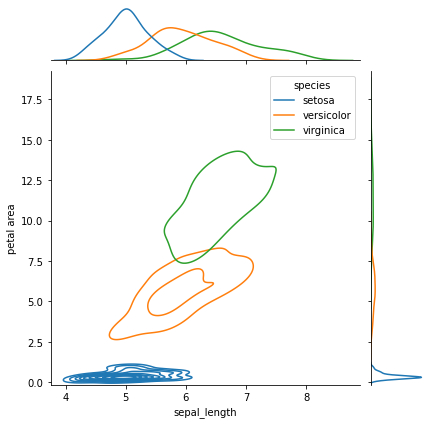

In [11]:
iris2 = iris
iris2["petal area"] = iris2.petal_length * iris2.petal_width
iris2
sns.jointplot(
    data=iris2,
    y="petal area",
    x="sepal_length",
    hue="species",
    kind = "kde"
)

In [12]:
ans = sns.load_dataset("anscombe")
ans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [13]:
#calculate summary statistics for each dataset. What do you notice?
ans.groupby("dataset").describe()
#very similar numbers for dataset 1-3, with 4 being higher

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

<AxesSubplot:xlabel='x', ylabel='y'>

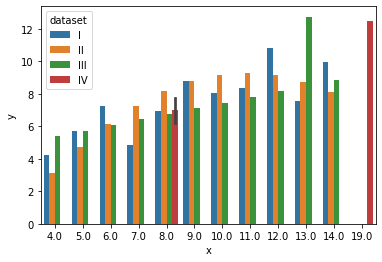

In [14]:
#Plot the x and y values from the anscombe data. 
# Each dataset should be in a separate column.
sns.barplot(
    data=ans,
    x="x",
    y="y",
    hue="dataset"
)

#sns.relplot(data=df,x="x",y="y",col=dataset)

In [15]:
#Load the InsectSprays dataset and read it's documentation. 


from matplotlib.pyplot import xkcd
from pydataset import data
is_df = data("InsectSprays")
#data("InsectSprays",show_doc=True)
is_df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 1 to 72
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   count   72 non-null     int64 
 1   spray   72 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


Text(0.5, 1.0, 'box plot of effectiveness of Insect Sprays')

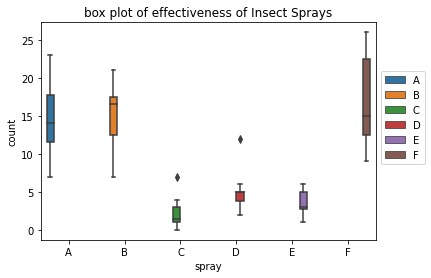

In [16]:
# Create a boxplot that shows the effectiveness of the different 
# insect sprays.
from matplotlib.pyplot import legend


sns.boxplot(
    data=is_df,
    y="count",
    x="spray",
    hue = "spray"

)
plt.legend(bbox_to_anchor=(1,.8),loc=2)
plt.title("box plot of effectiveness of Insect Sprays")


In [17]:
#Load the swiss dataset and read it's documentation. 
from pydataset import data
swiss_df = data("swiss")
#data("InsectSprays",show_doc=True)
swiss_df.info()
swiss_df.head()



<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [18]:
#Create an attribute named is_catholic that holds a 
# boolean value of whether or not the province is Catholic. (
# Choose a cutoff point for what constitutes catholic)
swiss_df["is_catholic"] = swiss_df.Catholic > 50
swiss_df.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

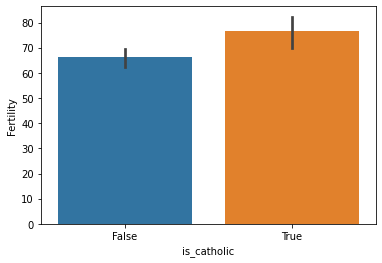

In [19]:
#Does whether or not a province is Catholic influence fertility?
sns.barplot(
    data=swiss_df,
    y="Fertility",
    x="is_catholic",
)
#seems like it

#sns.boxplot(x="is_catholic",y="fetrility",data=swiss)

In [45]:
#What measure correlates most strongly with fertility?
swiss_df.corr()
#iloc(:-1)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556,0.402813
Agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859,0.410503
Examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022,-0.597861
Education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322,-0.154677
Catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496,0.961723
Infant.Mortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000,0.166081
is_catholic,0.402813,0.410503,-0.597861,-0.154677,0.961723,0.166081,1.000000


<AxesSubplot:>

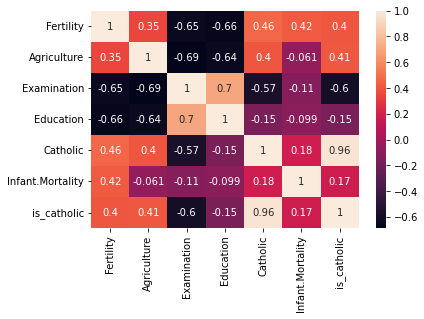

In [21]:
sns.heatmap(
    data = (swiss_df.corr()),
    annot = True
)
#being catholic


Text(0.5, 1.0, 'revenue by popular product')

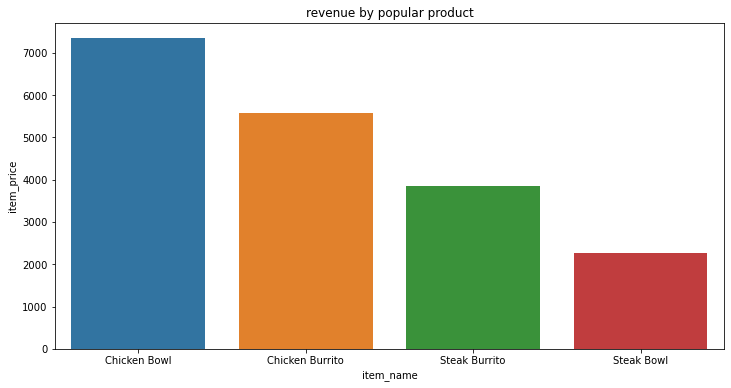

In [22]:
#Using the chipotle dataset from the previous exercise, 
# create a bar chart that shows the 4 most popular items 
# and the revenue produced by each.

chipotle_df = pd.read_csv('chipotle.csv')
chip_chart = chipotle_df.groupby("item_name").agg({"item_price":"sum"}).nlargest(4,columns="item_price")
chip_chart = chip_chart.reset_index()
plt.figure(figsize = (12,6))
sns.barplot(
    data = chip_chart,
    x='item_name', 
    y='item_price',
            )
plt.title("revenue by popular product")

#best_sellers=chipotle_df.groupby("item_name")["quantity"].sum().nlargest(4)
#revenue = orders[orders.item_name.isin(best_sellers.index)].groupby("item_name").item_price.sum()


In [24]:
#Load the sleepstudy data and read it's documentation. 
# Use seaborn to create a line chart of all the individual 
# subject's reaction times and a more prominant line 
# showing the average change in reaction time.



In [25]:
sleep_df = data("sleepstudy")
#data("sleepstudy",show_doc=True)

sleep_df.Subject = sleep_df.Subject.astype('string')
sleep_df.info()

sleep_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    string 
dtypes: float64(1), int64(1), string(1)
memory usage: 5.6 KB


,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [26]:
avg_sleep_series = sleep_df.groupby("Days")["Reaction"].mean()
avg_sleep_series

Days
0    256.651806
1    264.495756
2    265.361900
3    282.992011
4    288.649422
5    308.518456
6    312.178256
7    318.750583
8    336.629506
9    350.851222
Name: Reaction, dtype: float64

In [53]:
#Use seaborn to create a line chart of all the individual 
# subject's reaction times and a more prominant line 
# showing the average change in reaction time.

from matplotlib.lines import _LineStyle


g=plt.figure(figsize=(12,6))
g=plt.legend(loc=0)
g=sns.lineplot(
    data = sleep_df,
    x = "Days",
    y = "Reaction",
    hue = "Subject",
)
#sns.lineplot.?
g=sns.lineplot(
    data = sleep_df,
    x = "Days",
    y = "Reaction",
    color="blue",
    estimator='mean'
)

ImportError: cannot import name '_LineStyle' from 'matplotlib.lines' (/usr/local/anaconda3/lib/python3.9/site-packages/matplotlib/lines.py)

# notes from class


In [28]:
sns.get_dataset_names()


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [29]:
tips = sns.load_dataset("tips")

In [30]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [31]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [32]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


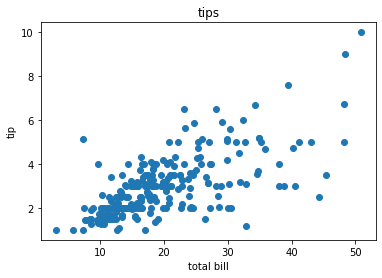

In [33]:
plt.scatter(tips.total_bill,tips.tip)
plt.title("tips")
plt.xlabel("total bill")
plt.ylabel('tip')
plt.show()

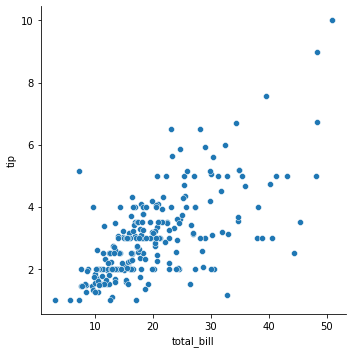

In [34]:
sns.relplot(data = tips, x="total_bill",y="tip")
plt.show()

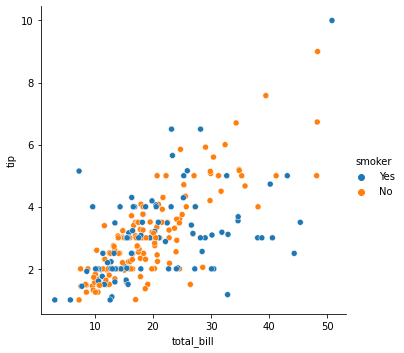

In [35]:
sns.relplot(data=tips, x="total_bill",y="tip",hue="smoker")

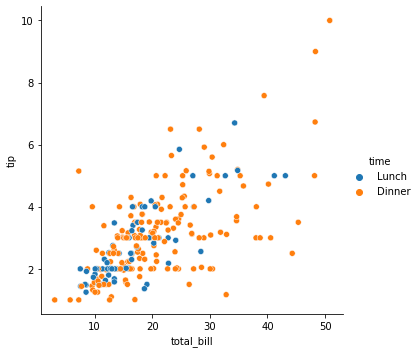

In [36]:
sns.relplot(
    data=tips, 
    x="total_bill",
    y="tip",
    hue="time"
    )

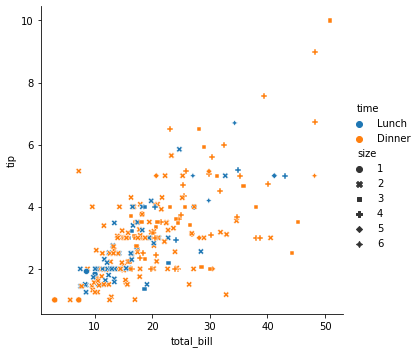

In [37]:
sns.relplot(
    data=tips, 
    x="total_bill",
    y="tip",
    hue="time",
    style="size"
    )
plt.show()

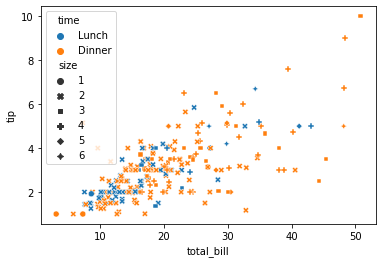

In [38]:
sns.scatterplot(
    data=tips, 
    x="total_bill",
    y="tip",
    hue="time",
    style="size"
    )
plt.show()

In [39]:
sns.relplot(data="tips",
            x="size",
            y="tip",
            kind = "line"
            #ci = None
            )

ValueError: Could not interpret value `size` for parameter `x`

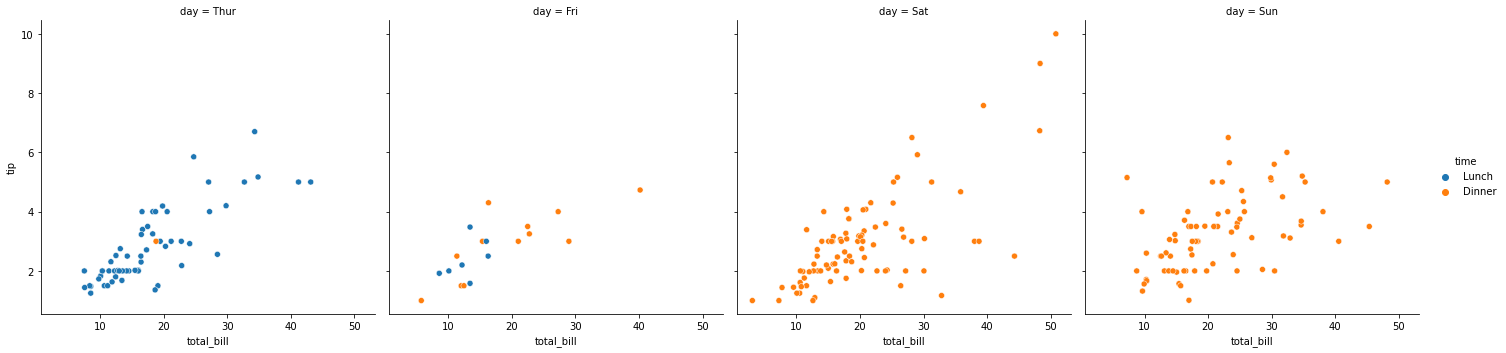

In [ ]:
sns.relplot(
    data=tips,
    x="total_bill",
    y="tip",
    hue="time",
    col="day"
    )

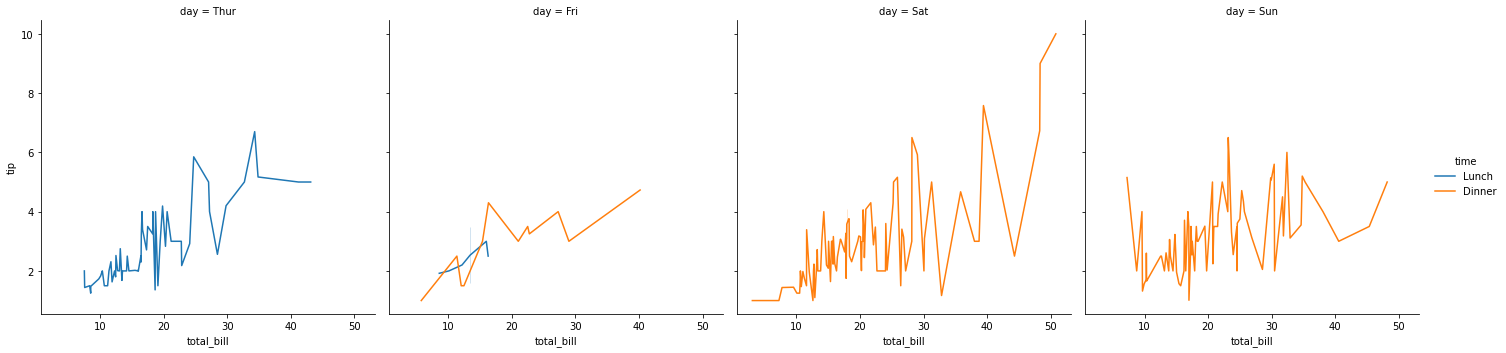

In [ ]:
sns.relplot(
    data=tips,
    x="total_bill",
    y="tip",
    hue="time",
    col="day",
    kind="line"
    )

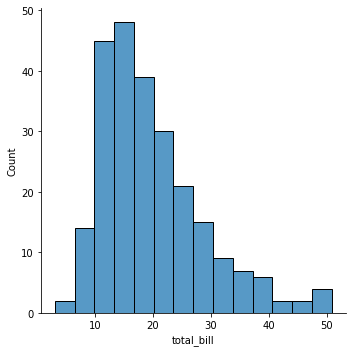

In [ ]:
sns.displot(
    data=tips,
    x="total_bill",
)

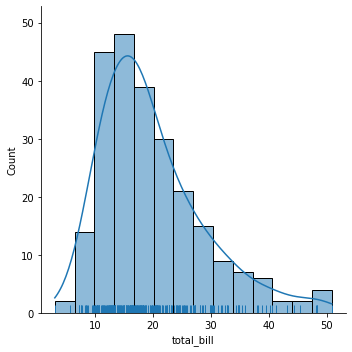

In [ ]:
sns.displot(
    data=tips,
    x="total_bill",
    kde = True, ##approx propability density
    rug = True ##measure of freqency (ticks along bottom)
)

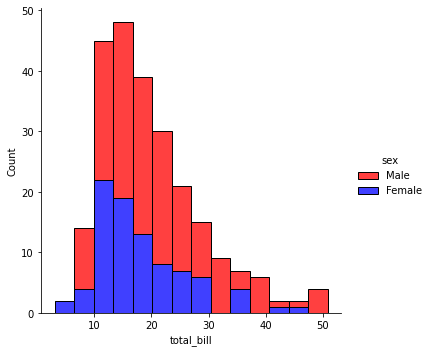

In [ ]:
sns.displot(
    data=tips,
    x="total_bill",
    hue="sex",
    multiple="stack",
    palette= ["r","b"]

)

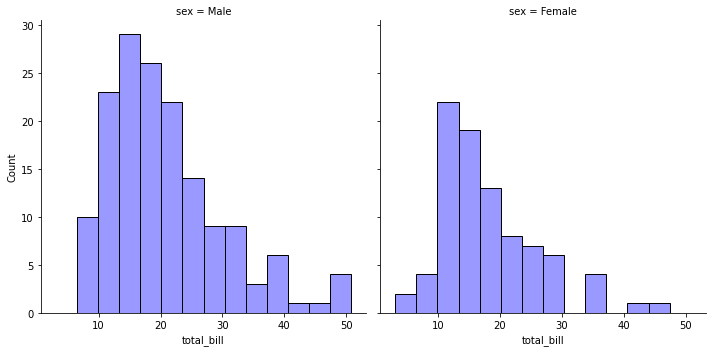

In [ ]:
sns.displot(
    data=tips,
    x="total_bill",
    col="sex",
    color="blue",
    alpha=0.4
)

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

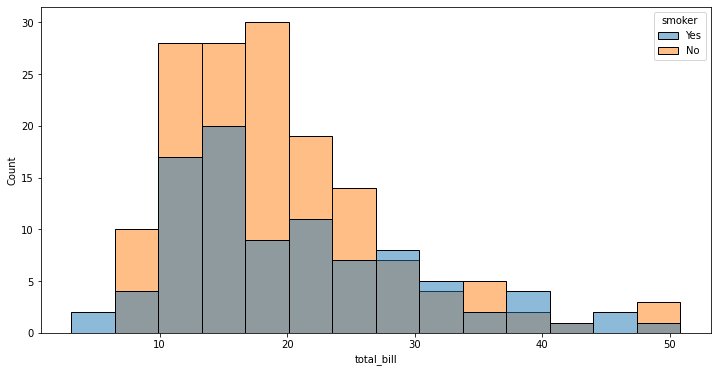

In [ ]:
sns.histplot(
    data=tips,
    x="total_bill",
    hue="smoker"
)

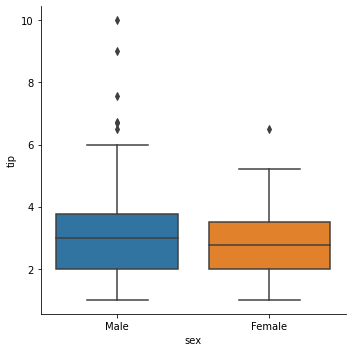

In [ ]:
sns.catplot(
    data=tips,
    x="sex",
    y="tip",
    kind="box"
)

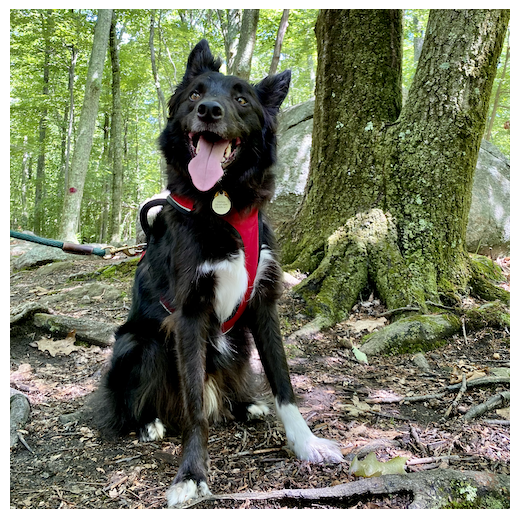

In [ ]:
sns.dogplot(
    data=tips,
    x="sex",
    y="tip",
    kind="box"
)

In [ ]:
fig, ax = plt.subplot(2,2, figsize(10,10))
sns.boxplot(
    data=tips,
    x="tip",
    
)

TypeError: 'tuple' object is not callable

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

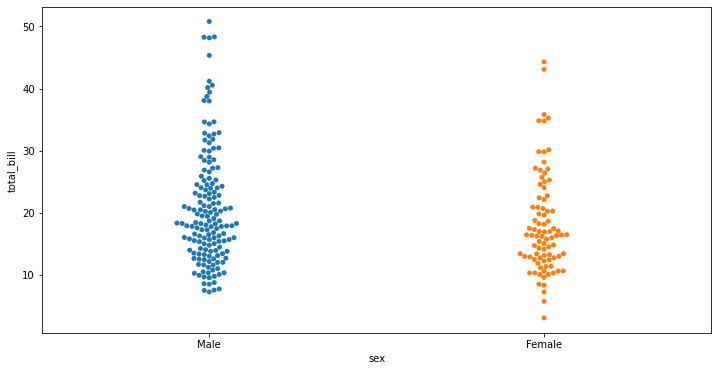

In [ ]:
sns.swarmplot(
    data=tips,
    y="total_bill",
    x="sex"
)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

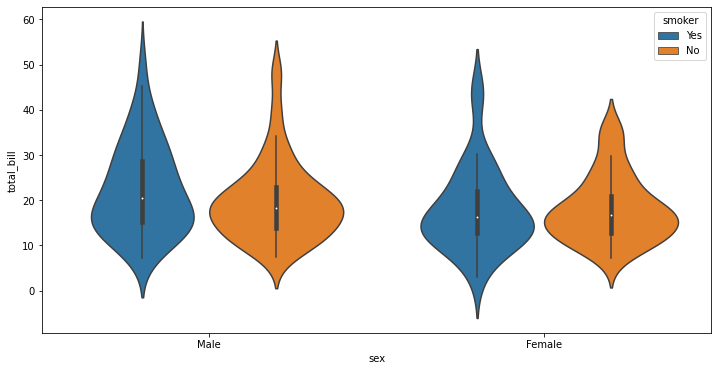

In [ ]:
sns.violinplot(
    data=tips,
    y="total_bill",
    x="sex",
    hue="smoker"
)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

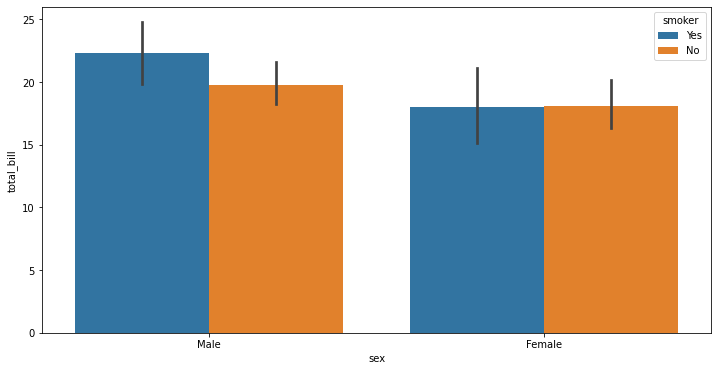

In [ ]:
sns.barplot(
    data=tips,
    y="total_bill",
    x="sex",
    hue="smoker"
    #ci = None ##removes confidence interval line
)

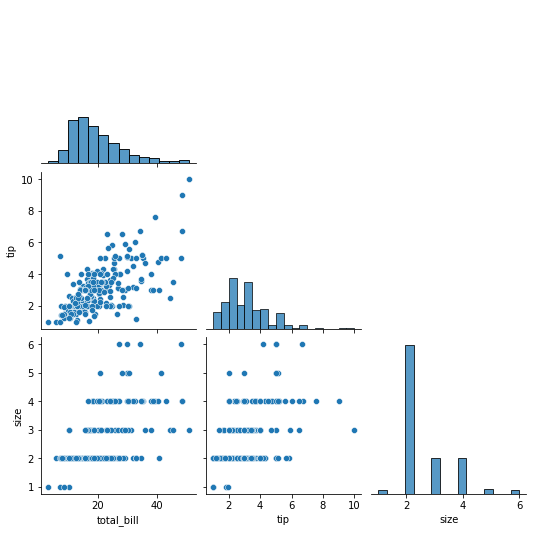

In [ ]:
sns.pairplot(
    data=tips, 
    corner=True
)

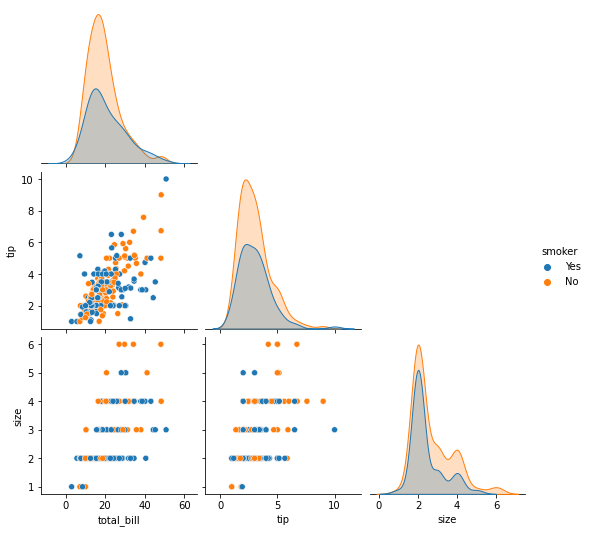

In [ ]:
sns.pairplot(
    data=tips, 
    hue="smoker",
    corner=True
)

In [ ]:
sns.pairplot(
    data=tips, 
    vars = ["1","2"]
    hue="smoker",
    corner=True
)

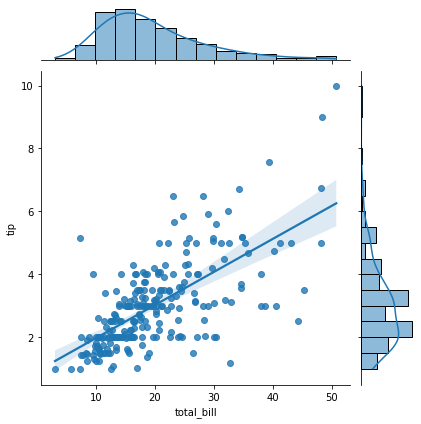

In [ ]:
sns.jointplot(
    data=tips,
    x="total_bill",
    y="tip",
    kind="reg"
)

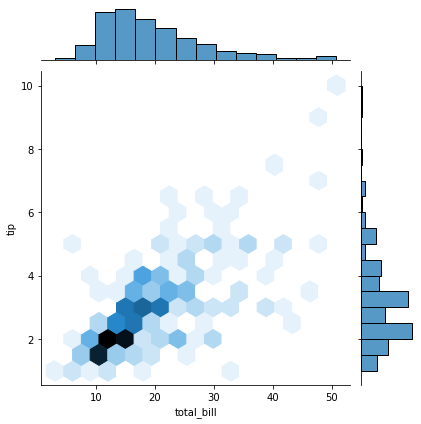

In [ ]:
sns.jointplot(
    data=tips,
    x="total_bill",
    y="tip",
    kind="hex"
)

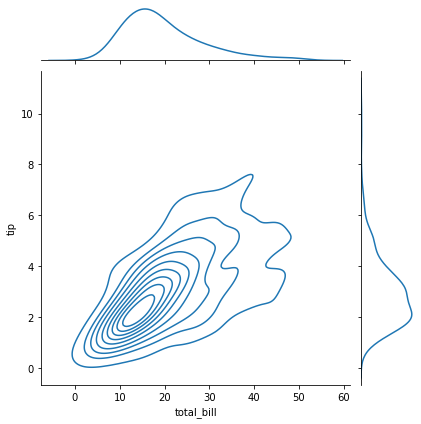

In [ ]:
sns.jointplot(
    data=tips,
    x="total_bill",
    y="tip",
    kind="kde"
)

In [ ]:
ctab=pd.crosstab(tips.time,tips.smoker,margins=True)


<AxesSubplot:xlabel='smoker', ylabel='time'>

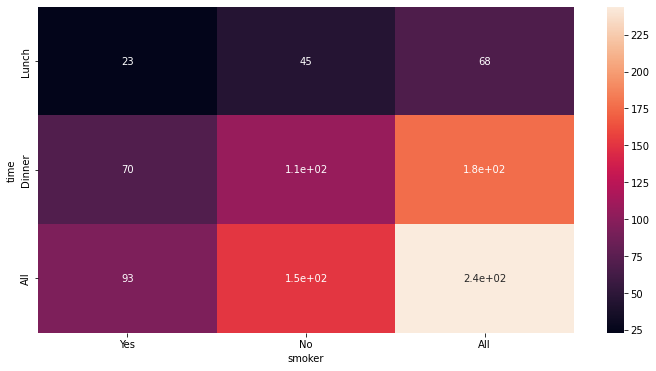

In [ ]:
sns.heatmap(ctab,annot=True)